## **Sessa Empirical Estimator**  
### *By Jyreneah Angel and Nicole Grace Joligon* 

## **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from some_module import See_KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import ecdf

## **CONVERSION**

***Import Dataset***

In [1]:
# Load simulated data based on med.events
import pandas as pd

simulated_df = pd.read_csv("../med_events.csv")

# Display the last few rows
print(simulated_df.tail())

     PATIENT_ID        DATE  PERDAY CATEGORY  DURATION
995          45  01/03/2023       2     medA        14
996          38  05/04/2023       1     medA        14
997          11  05/02/2022       5     medD        90
998          28  11/27/2022       3     medB        90
999          13  05/19/2023       4     medB        90


***Match R function***

In [2]:
# Rename columns in the dataframe
new_columns = ["pnr", "eksd", "perday", "ATC", "dur_original"]
simulated_df = simulated_df.set_axis(new_columns, axis=1)

# Display the first few rows
simulated_df.head()

,pnr,eksd,perday,ATC,dur_original
0,10,12/24/2023,4,medE,90
1,13,01/09/2022,3,medE,30
2,7,02/22/2022,5,medE,30
3,16,06/22/2023,3,medC,7
4,33,11/03/2022,4,medC,7


***eksd string to DateTime***

In [3]:
simulated_df['eksd'] = pd.to_datetime(simulated_df['eksd'])

simulated_df.head()

,pnr,eksd,perday,ATC,dur_original
0,10,2023-12-24,4,medE,90
1,13,2022-01-09,3,medE,30
2,7,2022-02-22,5,medE,30
3,16,2023-06-22,3,medC,7
4,33,2022-11-03,4,medC,7


## **DATA ANALYSIS**

In [14]:
# Count missing values in each column
simulated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pnr           1000 non-null   int64         
 1   eksd          1000 non-null   datetime64[ns]
 2   perday        1000 non-null   int64         
 3   ATC           1000 non-null   object        
 4   dur_original  1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 35.2+ KB


In [13]:
# Display DataFrame summary  
simulated_df.isnull().sum()

pnr             0
eksd            0
perday          0
ATC             0
dur_original    0
dtype: int64

In [12]:
# Get summary statistics of the DataFrame
simulated_df.describe(include="all")

,pnr,eksd,perday,ATC,dur_original
count,1000.000000,1000,1000.000000,1000,1000.000000
unique,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,medD,NaN
freq,NaN,NaN,NaN,218,NaN
mean,25.553000,2023-01-04 09:33:07.200000256,2.976000,NaN,40.350000
min,1.000000,2022-01-01 00:00:00,1.000000,NaN,7.000000
25%,12.000000,2022-07-06 00:00:00,2.000000,NaN,14.000000
50%,25.000000,2023-01-08 12:00:00,3.000000,NaN,30.000000
75%,38.000000,2023-06-29 06:00:00,4.000000,NaN,60.000000
max,50.000000,2023-12-31 00:00:00,5.000000,NaN,90.000000


***Distribution of 'perday'***

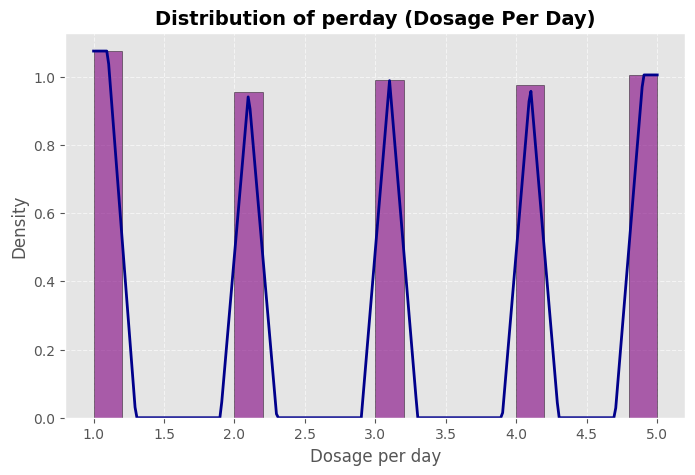

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(8, 5))

counts, bins, _ = ax.hist(simulated_df["perday"], bins=20, color="purple", edgecolor="black", alpha=0.6, density=True)

bin_centers = (bins[:-1] + bins[1:]) / 2  # Get center points of bins
smoothed_curve = np.interp(np.linspace(bins[0], bins[-1], 300), bin_centers, counts)

ax.plot(np.linspace(bins[0], bins[-1], 300), smoothed_curve, color="darkblue", linewidth=2)

ax.set_title("Distribution of perday (Dosage Per Day)", fontsize=14, fontweight="bold")
ax.set_xlabel("Dosage per day", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.grid(True, linestyle="--", alpha=0.6)

plt.show()


***Distribution of 'dur_original'***

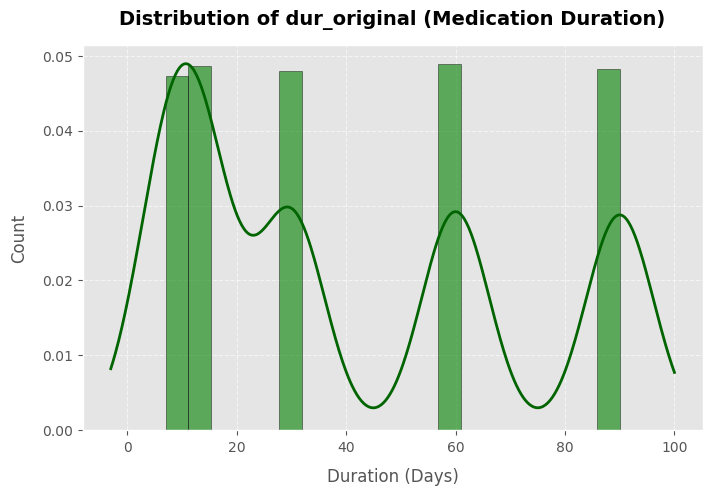

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(8, 5))

data = simulated_df["dur_original"].dropna()

counts, bins, _ = ax.hist(data, bins=20, color="green", edgecolor="black", alpha=0.6, density=True)

kde = gaussian_kde(data, bw_method=0.2)  

x_vals = np.linspace(min(data) - 10, max(data) + 10, 500)
y_vals = kde(x_vals)

y_vals *= max(counts) / max(y_vals)

ax.plot(x_vals, y_vals, color="darkgreen", linewidth=2, linestyle="-")

ax.set_title("Distribution of dur_original (Medication Duration)", fontsize=14, fontweight="bold", pad=15)
ax.set_xlabel("Duration (Days)", fontsize=12, labelpad=10)
ax.set_ylabel("Count", fontsize=12, labelpad=10)
ax.grid(True, linestyle="--", alpha=0.6)

plt.show()


***Count of unique values in 'ATC'***

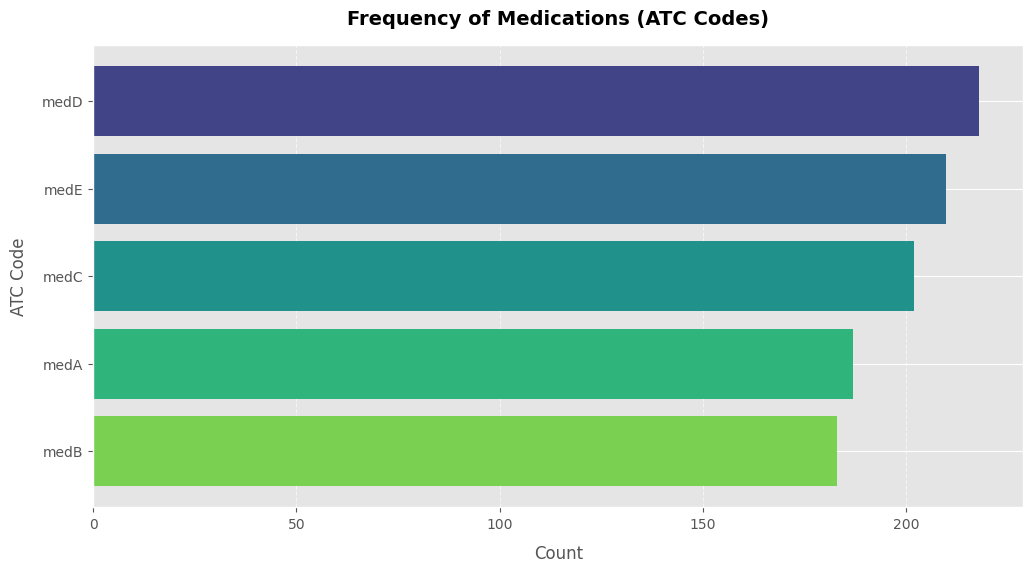

In [33]:
import matplotlib.pyplot as plt

atc_counts = simulated_df["ATC"].value_counts()

fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(atc_counts.index, atc_counts.values, color=plt.cm.viridis(np.linspace(0.2, 0.8, len(atc_counts))))

ax.set_title("Frequency of Medications (ATC Codes)", fontsize=14, fontweight="bold", pad=15)
ax.set_xlabel("Count", fontsize=12, labelpad=10)
ax.set_ylabel("ATC Code", fontsize=12, labelpad=10)

ax.invert_yaxis()

ax.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()


***Trend of medication start dates over time***

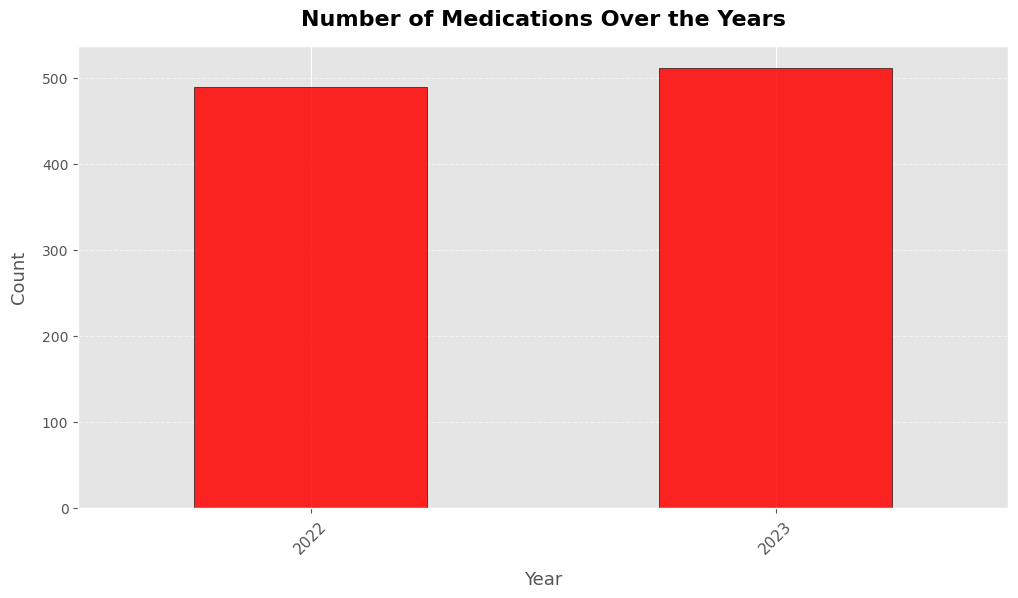

In [42]:
import matplotlib.pyplot as plt

year_counts = simulated_df["eksd"].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))

year_counts.plot(kind="bar", color="red", edgecolor="black", alpha=0.85)

plt.title("Number of Medications Over the Years", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Year", fontsize=13, labelpad=10)
plt.ylabel("Count", fontsize=13, labelpad=10)

plt.xticks(rotation=45, fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


***Boxplots***

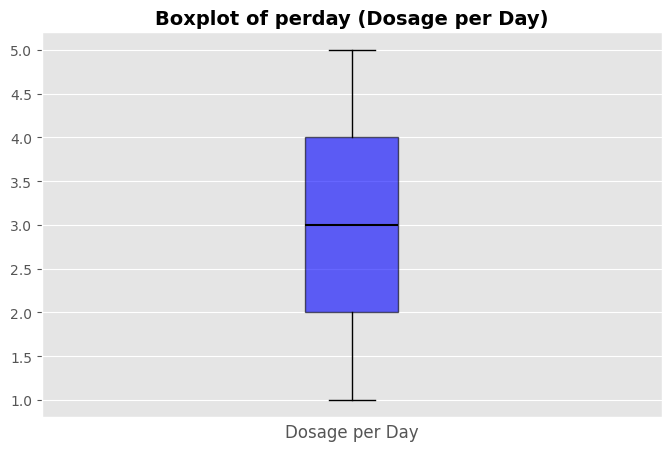

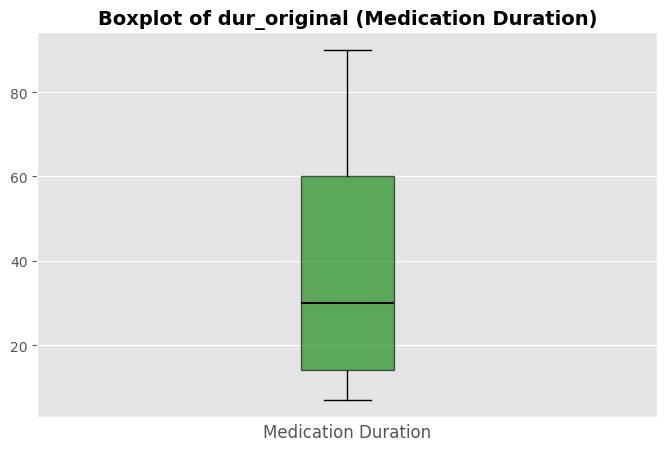

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

ax.boxplot(simulated_df["perday"].dropna(), patch_artist=True, boxprops=dict(facecolor="blue", alpha=0.6), 
           medianprops=dict(color="black", linewidth=1.5), whiskerprops=dict(color="black"), capprops=dict(color="black"))

ax.set_title("Boxplot of perday (Dosage per Day)", fontsize=14, fontweight="bold")
ax.set_xlabel("Dosage per Day", fontsize=12)
ax.set_xticks([])  

plt.show()


fig, ax = plt.subplots(figsize=(8, 5))

ax.boxplot(simulated_df["dur_original"].dropna(), patch_artist=True, boxprops=dict(facecolor="green", alpha=0.6), 
           medianprops=dict(color="black", linewidth=1.5), whiskerprops=dict(color="black"), capprops=dict(color="black"))

ax.set_title("Boxplot of dur_original (Medication Duration)", fontsize=14, fontweight="bold")
ax.set_xlabel("Medication Duration", fontsize=12)
ax.set_xticks([])

plt.show()


***Correlation Heatmap***

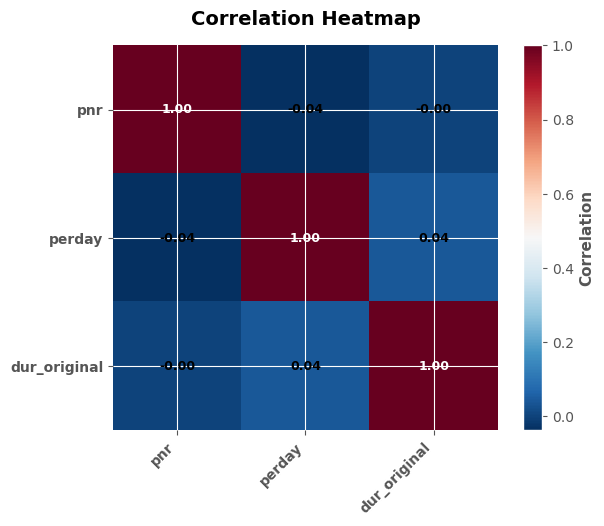

In [47]:
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = simulated_df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 5))

cax = ax.imshow(corr_matrix, cmap="RdBu_r", interpolation="nearest")

cbar = plt.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Correlation", fontsize=11, fontweight="bold")

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha="right", fontsize=10, fontweight="bold")
ax.set_yticklabels(corr_matrix.columns, fontsize=10, fontweight="bold")

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        color = "white" if abs(value) > 0.5 else "black" 
        ax.text(j, i, f"{value:.2f}", ha="center", va="center", color=color, fontsize=9, fontweight="bold")

ax.set_title("Correlation Heatmap", fontsize=14, fontweight="bold", pad=15)

ax.spines[:].set_visible(False)

plt.show()




## **SIMULATE**

***Sessa Empirical Estimator using K Means***

**A. ATC = medA**